## FINAL PROJECT
<br>
KENNEDY, THOMAS R
<br>
DATA 101, PROFESSOR SCHMIDT

In [1]:
# IMPORTS

# STANDARD + IMG HELP

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

# SKLEARN

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score

# TENSORFLOW AND KERAS

import tensorflow as tf
import keras
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

# EDA
  

In [2]:
# lOAD THE DATA

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [10]:
# I'D LIKE TO VIZUALIZE A SAMPLE IMAGE, LET'S SEE WHAT SHAPE THE DATA IS IN

print(x_train.shape)


(60000, 28, 28)


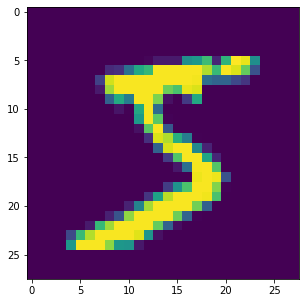

In [12]:
# GREAT... SO WHAT DO THESE IMAGES LOOK LIKE?

plt.figure(figsize = (10,5))
plt.imshow(x_train[0])
plt.show()

In [24]:
# WHAT VALUES DO WE HAVE INCLUDED AS LABELS?

print(sorted(np.unique(y_train)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


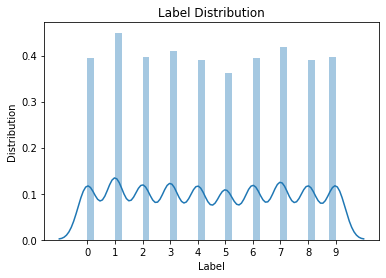

In [33]:
# WHAT IS THE DISTRIBUTION OF THESE LABELS?

sns.distplot(y_train)
plt.title('Label Distribution')
plt.xticks(np.unique(y_train))
plt.xlabel('Label')
plt.ylabel('Distribution')
plt.show()

## LET'S RUN SOME MODELS!


## - RANDOM FOREST

In [106]:
# RANDOM FOREST CLASSIFIER

rforest = RandomForestClassifier(max_depth=20)
rforest.fit(x_train.reshape(-1,784), y_train)
y_preds = rforest.predict(x_test.reshape(-1, 784))
rforest.score(x_test.reshape(-1, 784),y_test)

0.9481

[[ 963    0    6    1    4    7   10    3    5   12]
 [   0 1120    0    1    1    3    4    4    4    4]
 [   1    7  979   17    6    2    1   16   12    6]
 [   1    2    8  951    2   38    0    2   14   11]
 [   2    0    5    0  931    3    7    6   10   19]
 [   0    2    2   13    2  818   11    0    8    7]
 [   4    2    5    0    6    7  923    1    7    0]
 [   2    2    9   11    4    2    0  965    4    7]
 [   6    0   17   11    3    7    2    8  894    6]
 [   1    0    1    5   23    5    0   23   16  937]]


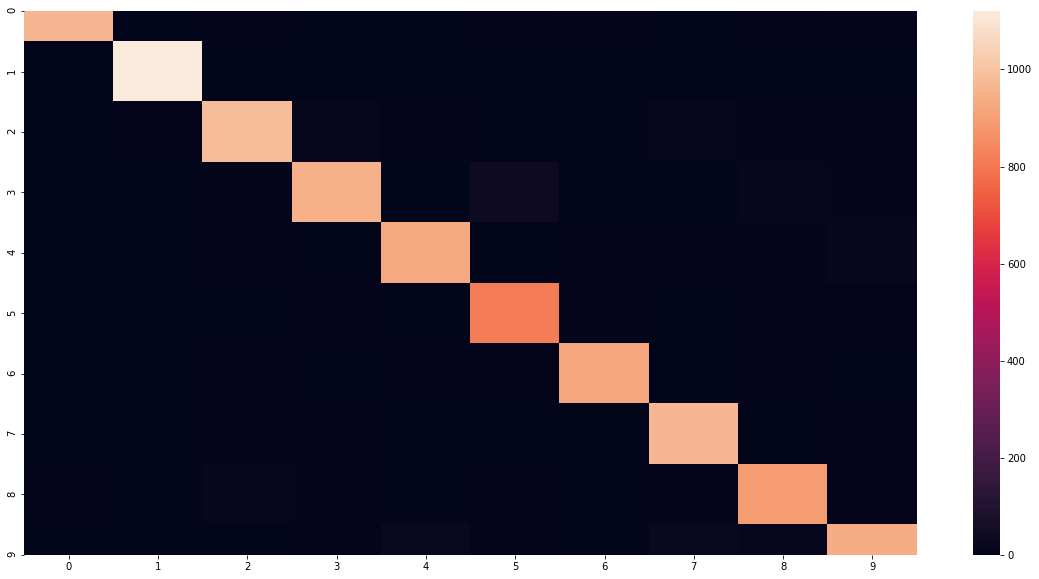

In [107]:
# WHERE DOES THE RANDOM FOREST FAIL?

rfconf = cm(y_preds, y_test)
plt.figure(figsize = (20,10))
sns.heatmap(rfconf)
print(rfconf)

## - K NEAREST NEIGHBOR

In [108]:
# K NEAREST NEIGHBOR CLASSIFIER?

knn = KNeighborsClassifier()
knn.fit(x_train.reshape(-1,784) ,y_train)
Y_pred = knn.predict(x_test.reshape(-1, 784))
accuracy_score(Y_pred,y_test)

0.9688

[[ 974    0   11    0    3    5    5    0    8    5]
 [   1 1133    8    3    7    0    3   22    3    7]
 [   1    2  991    3    0    0    0    4    5    3]
 [   0    0    2  976    0   12    0    0   13    9]
 [   0    0    1    1  944    2    3    3    6    7]
 [   1    0    0   13    0  862    2    0   12    3]
 [   2    0    1    1    4    4  945    0    5    1]
 [   1    0   15    6    2    1    0  988    5   10]
 [   0    0    3    3    1    2    0    0  913    2]
 [   0    0    0    4   21    4    0   11    4  962]]


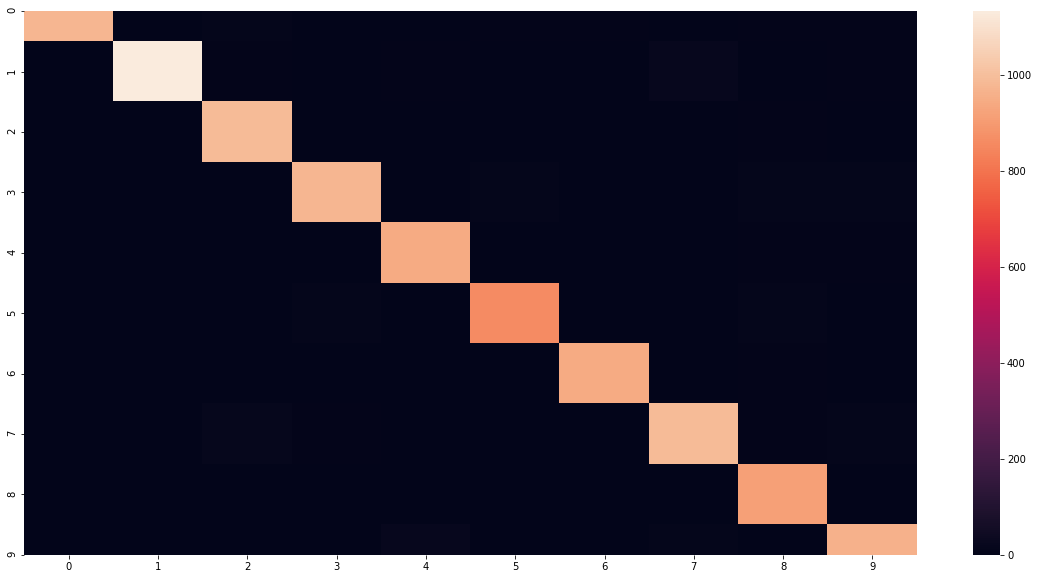

In [109]:
# WHERE DOES THE KNN FAIL?

knn_conf = cm(Y_pred, y_test)
plt.figure(figsize = (20,10))
sns.heatmap(knn_conf)
print(knn_conf)

## CONVOLUTIONAL NEURAL NET


In [110]:
# RESHAPE...

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [111]:
# NORMALIZE THE TRAINING AND TEST DATA

x_train = x_train / 255
x_test = x_test / 255

In [112]:
# KERAS ONEHOT VECTOR

y_train = to_categorical(y_train, num_classes = 10)

In [113]:
# BUILDING THE CNN

model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.50))


model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.50))


model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [114]:
# ADAM OPTIMIZER

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [115]:
# COMPILE THE MODEL

model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [116]:
# SET THE EPOCHS AND BATCH SIZE

epochs = 300

batch_size = 100

In [117]:
# FIT THE MODEL

model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs)
          

Epoch 1/300
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
600/600 [==============================] - 132s 221ms/step - loss: 0.9145 - accuracy: 0.6867
Epoch 2/300
600/600 [==============================] - 123s 205ms/step - loss: 0.2409 - accuracy: 0.9262
Epoch 3/300
600/600 [==============================] - 121s 202ms/step - loss: 0.1628 - accuracy: 0.9500
Epoch 4/300
600/600 [==============================] - 123s 205

Epoch 146/300
600/600 [==============================] - 126s 210ms/step - loss: 0.0041 - accuracy: 0.9986
Epoch 147/300
600/600 [==============================] - 125s 209ms/step - loss: 0.0052 - accuracy: 0.9985
Epoch 148/300
600/600 [==============================] - 126s 209ms/step - loss: 0.0046 - accuracy: 0.9985
Epoch 149/300
600/600 [==============================] - 125s 209ms/step - loss: 0.0047 - accuracy: 0.9985
Epoch 150/300
600/600 [==============================] - 125s 208ms/step - loss: 0.0047 - accuracy: 0.9985
Epoch 151/300
600/600 [==============================] - 125s 209ms/step - loss: 0.0046 - accuracy: 0.9984
Epoch 152/300
600/600 [==============================] - 125s 208ms/step - loss: 0.0040 - accuracy: 0.9986
Epoch 153/300
600/600 [==============================] - 125s 209ms/step - loss: 0.0047 - accuracy: 0.9984
Epoch 154/300
600/600 [==============================] - 125s 209ms/step - loss: 0.0045 - accuracy: 0.9985
Epoch 155/300
600/600 [==============

600/600 [==============================] - 125s 208ms/step - loss: 0.0026 - accuracy: 0.9992
Epoch 299/300
600/600 [==============================] - 125s 209ms/step - loss: 0.0028 - accuracy: 0.9990
Epoch 300/300
600/600 [==============================] - 124s 207ms/step - loss: 0.0023 - accuracy: 0.9992


In [118]:
Y_pred = model.predict(x_test)
Y_pred_label = [np.argmax(i) for i in Y_pred]
accuracy_score(Y_pred_label,y_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


0.996

[[ 978    0    0    0    0    0    2    0    0    0]
 [   0 1134    1    0    0    0    2    2    0    0]
 [   0    0 1029    0    0    0    0    1    0    0]
 [   0    1    0 1006    0    3    0    0    2    0]
 [   0    0    0    0  979    0    0    0    0    6]
 [   0    0    0    3    0  888    0    0    1    0]
 [   0    0    0    0    0    1  953    0    0    0]
 [   1    0    2    0    0    0    0 1022    0    2]
 [   1    0    0    1    0    0    1    1  970    0]
 [   0    0    0    0    3    0    0    2    1 1001]]


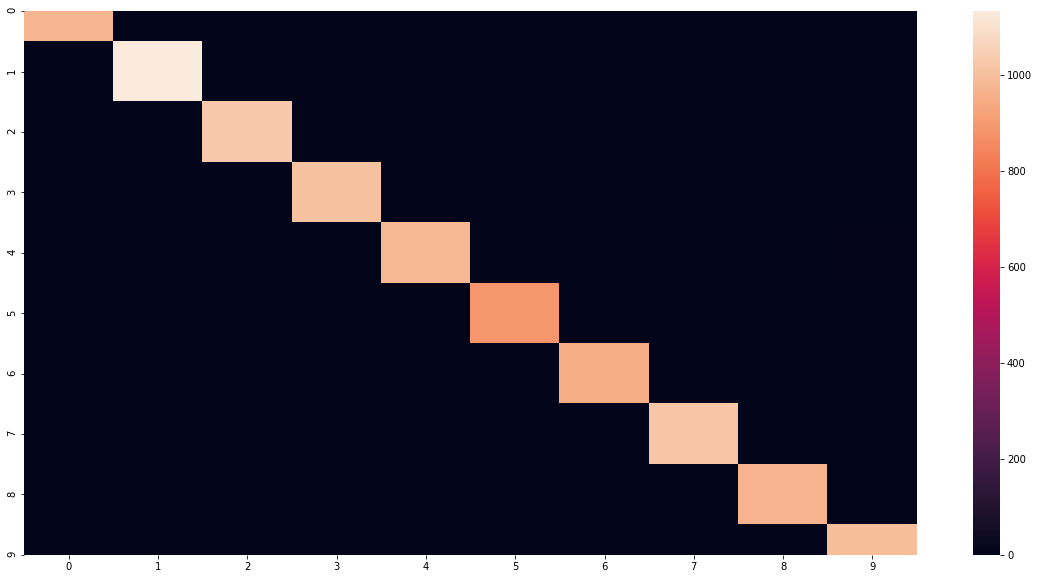

In [119]:
cnn_conf = cm(Y_pred_label, y_test)
plt.figure(figsize = (20,10))
sns.heatmap(cnn_conf)
print(cnn_conf)